# LIMPIEZA DE DATOS (CSV)

A partir del documento csv adjunto, limpiar los datos para evitar errores ya sean por formato, elementos duplicados e incluso errores tipográficos. 
Puedes usar pandas para realizar este filtrado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

df = pd.read_csv('./dataset_errores_100.csv')

A) Limpieza de los datos utilizando distintos filtros

In [ ]:
print("\n" + "=" * 80)
print("LIMPIEZA DE DATOS")
print("=" * 80)

df_clean = df.copy()

# 1. Limpieza de fechas
def limpiar_fecha(fecha):
    
    if pd.isna(fecha):
        return None
    fecha_str = str(fecha).strip()
    formatos = ['%Y-%m-%d', '%d/%m/%Y', '%m-%d-%y', '%d-%m-%y']
    
    for formato in formatos:
        
        try:
            fecha_parsed = pd.to_datetime(fecha_str, format=formato)
            return fecha_parsed
        except:
            continue

    return None

df_clean['fecha'] = df_clean['fecha'].apply(limpiar_fecha)
registros_sin_fecha = df_clean['fecha'].isna().sum()
print(f"Registros sin fecha válida: {registros_sin_fecha}")
df_clean = df_clean.dropna(subset=['fecha'])

# 2. Limpieza de productos
df_clean['producto'] = df_clean['producto'].str.strip()

correcciones_visibles = {
    'Camieeta': 'Camiseta',
    'Pantlaon': 'Pantalón'
}
df_clean['producto'] = df_clean['producto'].replace(correcciones_visibles)

registros_sin_producto = df_clean['producto'].isna().sum()
print(f"Registros sin producto: {registros_sin_producto}")
df_clean = df_clean.dropna(subset=['producto'])

# 3. Limpieza de cantidad
def limpiar_cantidad(cantidad):
    
    if pd.isna(cantidad):
        return None
    
    try:
        if isinstance(cantidad, str):
            cantidad = cantidad.strip()
            
            if cantidad.lower() in ['dos', 'two']:
                return 2    
        val = float(cantidad)

        return val if val > 0 else None
    except:
        return None

df_clean['cantidad'] = df_clean['cantidad'].apply(limpiar_cantidad)
registros_cantidad_invalida = df_clean['cantidad'].isna().sum()
print(f"Registros con cantidad inválida: {registros_cantidad_invalida}")
df_clean = df_clean.dropna(subset=['cantidad'])

# 4. Limpieza de precio
def limpiar_precio(precio):
    
    if pd.isna(precio):
        return None
    
    try:
        precio_str = str(precio).strip()
        precio_str = precio_str.replace('$', '').replace('€', '')
        precio_str = precio_str.replace(',', '.')

        if precio_str.lower() in ['free', 'gratis']:
            return 0
        val = float(precio_str)

        return val if val >= 0 else None
    except:
        return None

df_clean['precio'] = df_clean['precio'].apply(limpiar_precio)
registros_precio_invalido = df_clean['precio'].isna().sum()
print(f"Registros con precio inválido: {registros_precio_invalido}")
df_clean = df_clean.dropna(subset=['precio'])

# 5. Limpieza de edades
def limpiar_edad(edad):
    
    if pd.isna(edad):
        return None
    
    try:
        edad_str = str(edad).strip().lower()
        
        if edad_str == 'unknown':
            return None
    
        val = int(float(edad_str))

        return val if 0 < val <= 125 else None
    except:
        return None

df_clean['edad_cliente'] = df_clean['edad_cliente'].apply(limpiar_edad)
registros_edad_invalida = df_clean['edad_cliente'].isna().sum()
print(f"Registros con edad inválida: {registros_edad_invalida}")
df_clean = df_clean.dropna(subset=['edad_cliente'])

# 6. Correlación geográfica
correspondencia_geografica = {
    'Madrid': 'Madrid',
    'Barcelona': 'Cataluña',
    'Valencia': 'Valenciana',
    'Sevilla': 'Andalucía',
    'Bilbao': 'País Vasco'
}

def validar_geografia(row):
    tienda = row['tienda']
    region = row['region']
    
    if pd.isna(tienda) or pd.isna(region):
        return False
    region_correcta = correspondencia_geografica.get(tienda)

    return region_correcta == region

df_clean['geografia_valida'] = df_clean.apply(validar_geografia, axis=1)
registros_geografia_invalida = (~df_clean['geografia_valida']).sum()
print(f"Registros con geografía inválida: {registros_geografia_invalida}")
df_clean = df_clean[df_clean['geografia_valida']]
df_clean = df_clean.drop('geografia_valida', axis=1)

# 7. Limpieza de duplicados
duplicados = df_clean.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")
df_clean = df_clean.drop_duplicates()


LIMPIEZA DE DATOS
Registros sin fecha válida: 2
Registros sin producto: 1
Registros con cantidad inválida: 1
Registros con precio inválido: 0
Registros con edad inválida: 2
Registros con geografía inválida: 82
Registros duplicados encontrados: 2


Una vez limpio, utiliza matplotlib para visualizar los siguientes gráficos; Puedes añadir información que necesites para generarlo (usando pandas):

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("\n" + "=" * 80)
print("GENERANDO VISUALIZACIONES")
print("=" * 80)

fig = plt.figure(figsize=(16, 12))


GENERANDO VISUALIZACIONES


<Figure size 1600x1200 with 0 Axes>

- Gráfico de Barras por producto vendido (cantidad).

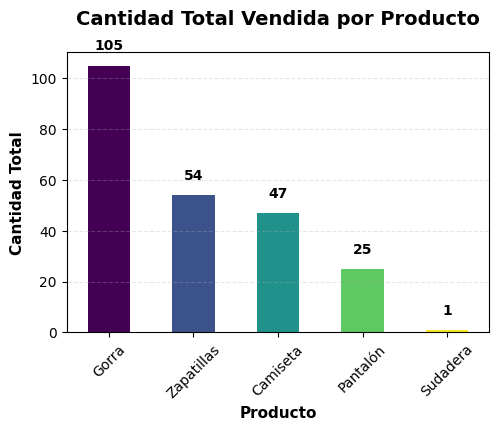

In [ ]:
ax1 = plt.subplot(2, 2, 1)
ventas_por_producto = df_clean.groupby('producto')['cantidad'].sum().sort_values(ascending=False)
colores = plt.cm.viridis(np.linspace(0, 1, len(ventas_por_producto)))
ventas_por_producto.plot(kind='bar', color=colores, ax=ax1)
ax1.set_title('Cantidad Total Vendida por Producto', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Producto', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cantidad Total', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(ventas_por_producto.values):
    ax1.text(i, v + 5, str(int(v)), ha='center', va='bottom', fontweight='bold')

- Gráfico de dispersión mostrando el total de productos vendidos por tienda.

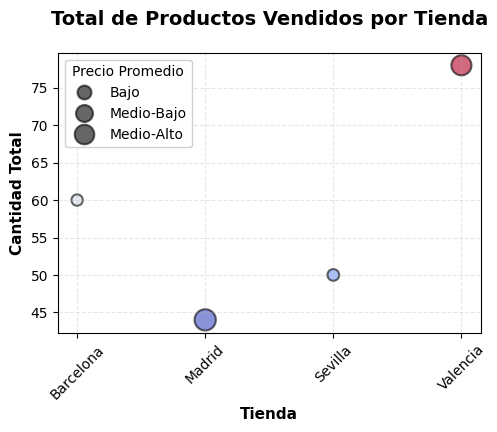

In [ ]:
ax2 = plt.subplot(2, 2, 2)
ventas_por_tienda = df_clean.groupby('tienda').agg({
    'cantidad': 'sum',
    'precio': 'mean'
}).reset_index()

scatter = ax2.scatter(ventas_por_tienda['tienda'].astype('category').cat.codes, 
        ventas_por_tienda['cantidad'],
        s=ventas_por_tienda['precio']*2,
        c=ventas_por_tienda['cantidad'],
        cmap='coolwarm',
        alpha=0.6,
        edgecolors='black',
        linewidth=1.5)

ax2.set_xticks(range(len(ventas_por_tienda)))
ax2.set_xticklabels(ventas_por_tienda['tienda'], rotation=45)
ax2.set_title('Total de Productos Vendidos por Tienda', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Tienda', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cantidad Total', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
legend = ax2.legend(handles, ['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'], 
        title="Precio Promedio", loc="upper left", framealpha=0.9)

- Gráfico de Pastel mostrando el número de ventas por región.

Text(0.5, 1.0, 'Número de Ventas por Región')

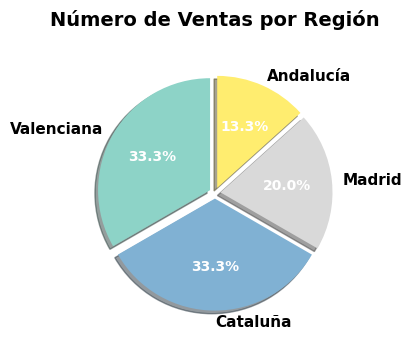

In [ ]:
ax3 = plt.subplot(2, 2, 3)
ventas_por_region = df_clean['region'].value_counts()
colores_pastel = plt.cm.Set3(np.linspace(0, 1, len(ventas_por_region)))

wedges, texts, autotexts = ax3.pie(ventas_por_region.values, 
        labels=ventas_por_region.index,
        autopct='%1.1f%%',
        colors=colores_pastel,
        startangle=90,
        explode=[0.05] * len(ventas_por_region),
        shadow=True)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

ax3.set_title('Número de Ventas por Región', fontsize=14, fontweight='bold', pad=20)

- Histograma mostrando la edad de las compras con respecto al precio.

C:\Users\Antonio\AppData\Local\Temp\ipykernel_13744\3751208106.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_por_edad = df_clean.groupby('rango_edad')['precio'].mean()


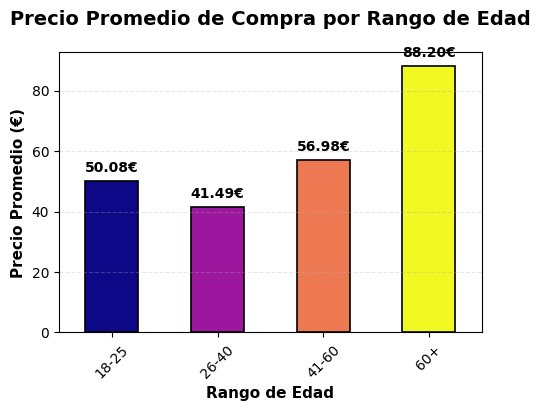

In [ ]:
ax4 = plt.subplot(2, 2, 4)

x = df_clean['edad_cliente']
y = df_clean['precio']

h = ax4.hist2d(x, y, bins=[15, 10], cmap='plasma', cmin=1)

cbar = plt.colorbar(h[3], ax=ax4)
cbar.set_label('Número de Transacciones', rotation=270, labelpad=15)

ax4.set_title('Distribución de Edad vs Precio (Histograma 2D)', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Edad del Cliente', fontsize=11, fontweight='bold')
ax4.set_ylabel('Precio (€)', fontsize=11, fontweight='bold')
ax4.grid(True, alpha=0.3, linestyle='--')